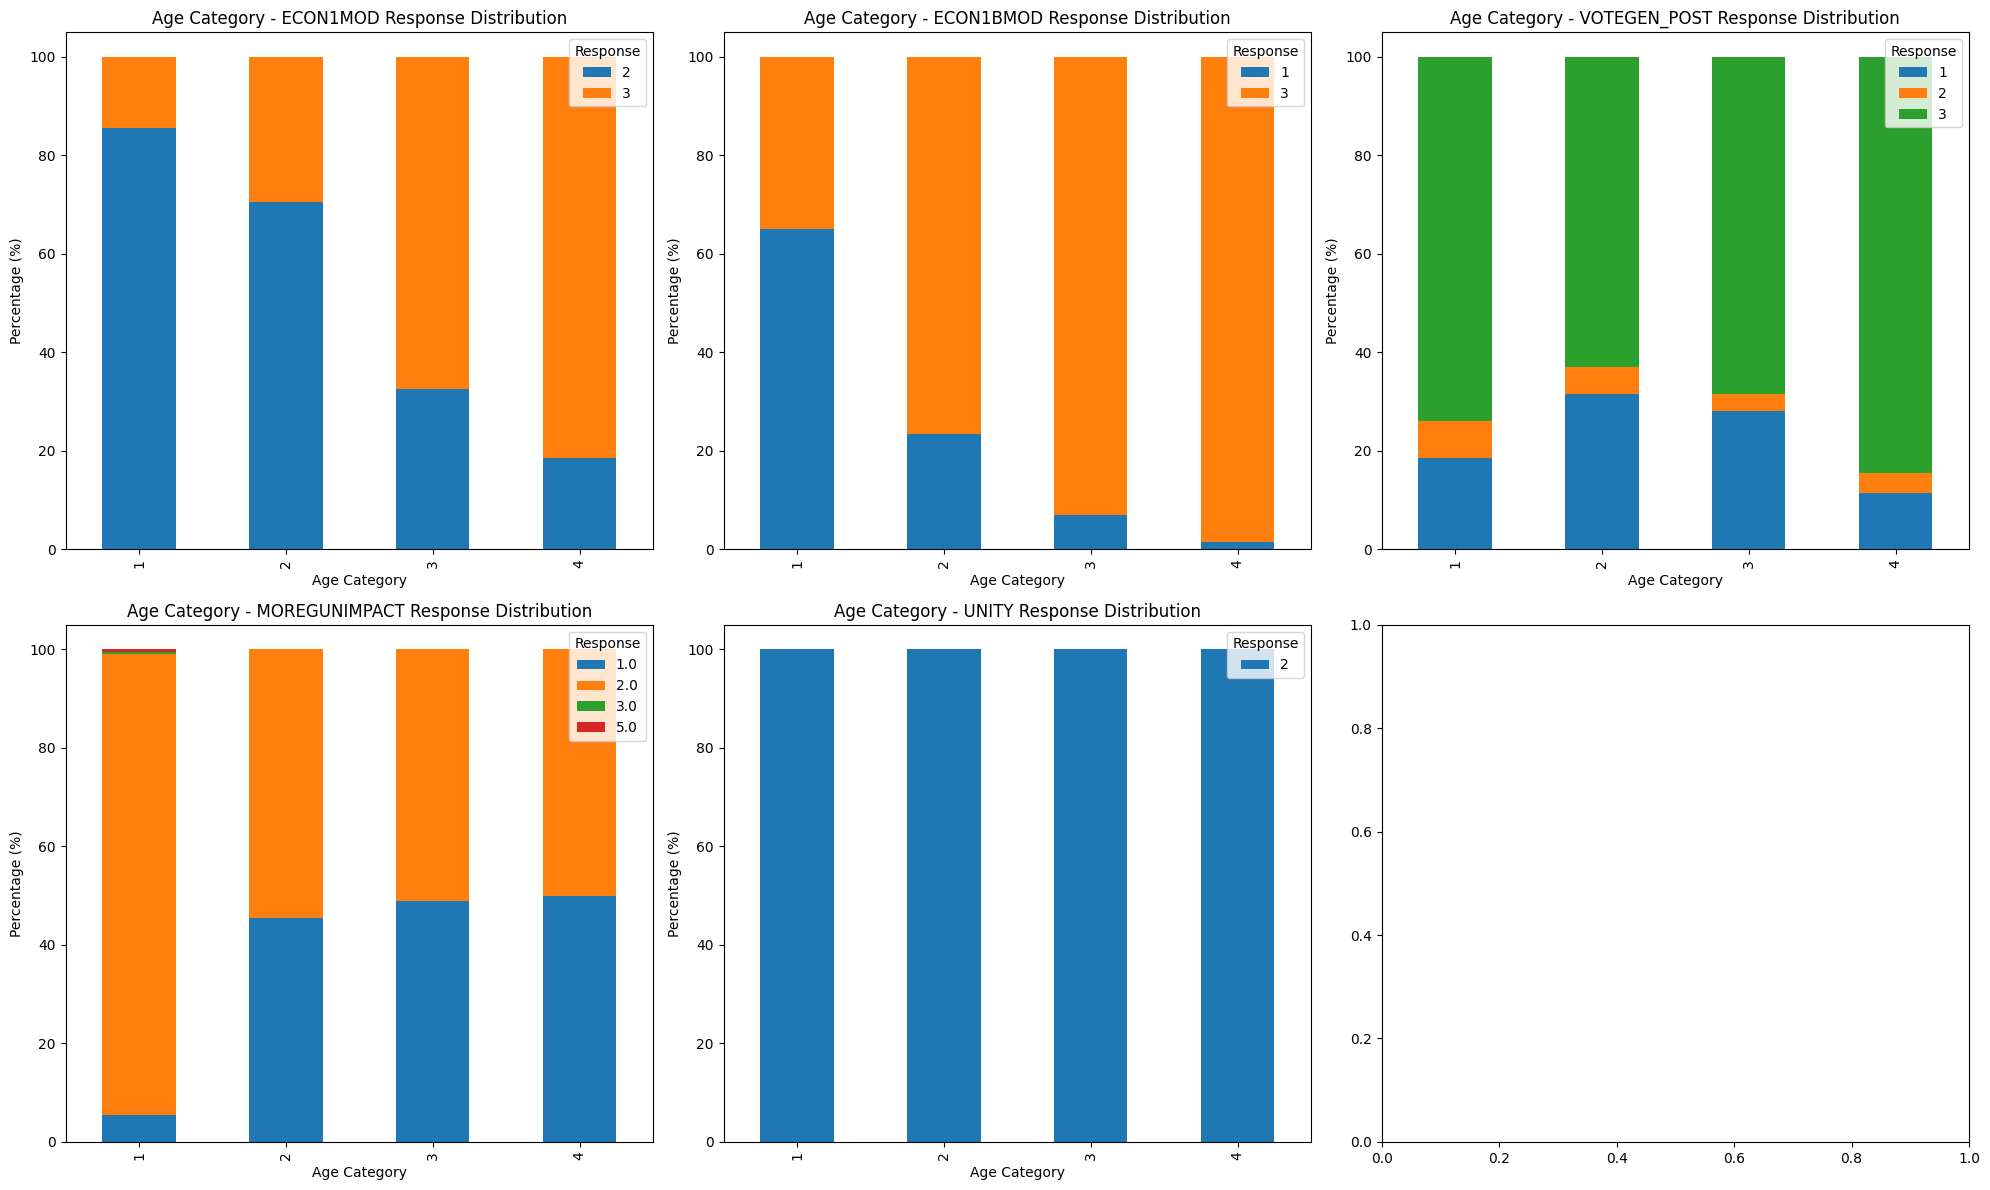

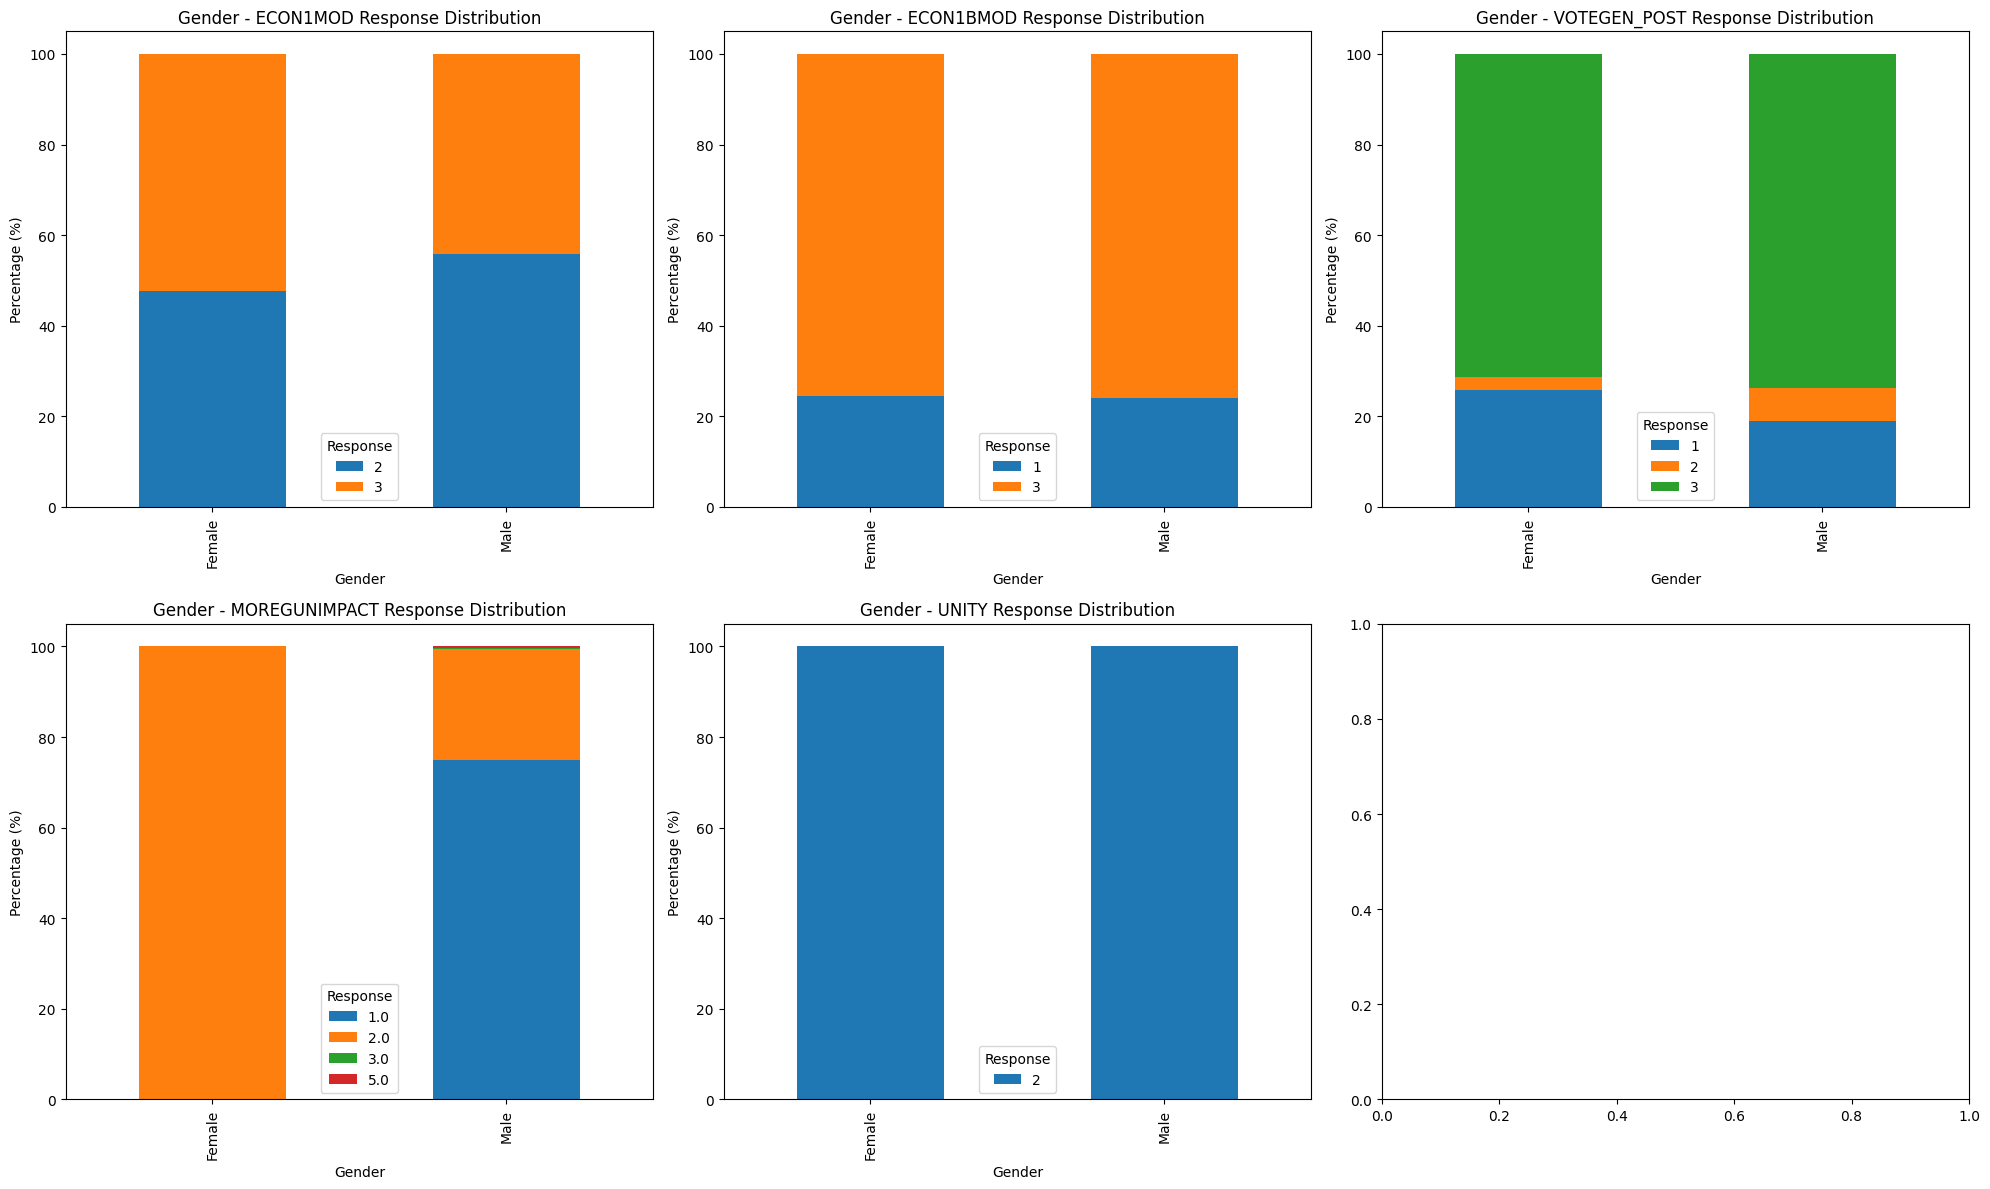


=== Response Distribution by Age Category (%) ===

ECON1MOD Distribution:
ECON1MOD     2     3
agecat              
1         85.5  14.5
2         70.5  29.5
3         32.5  67.5
4         18.5  81.5

ECON1BMOD Distribution:
ECON1BMOD     1     3
agecat               
1          65.0  35.0
2          23.5  76.5
3           7.0  93.0
4           1.5  98.5

VOTEGEN_POST Distribution:
VOTEGEN_POST     1    2     3
agecat                       
1             18.5  7.5  74.0
2             31.5  5.5  63.0
3             28.0  3.5  68.5
4             11.5  4.0  84.5

MOREGUNIMPACT Distribution:
MOREGUNIMPACT    1.0    2.0  3.0  5.0
agecat                               
1               5.53  93.47  0.5  0.5
2              45.50  54.50  0.0  0.0
3              49.00  51.00  0.0  0.0
4              50.00  50.00  0.0  0.0

UNITY Distribution:
UNITY       2
agecat       
1       100.0
2       100.0
3       100.0
4       100.0

=== Response Distribution by Gender (%) ===

ECON1MOD Distribution:
ECO

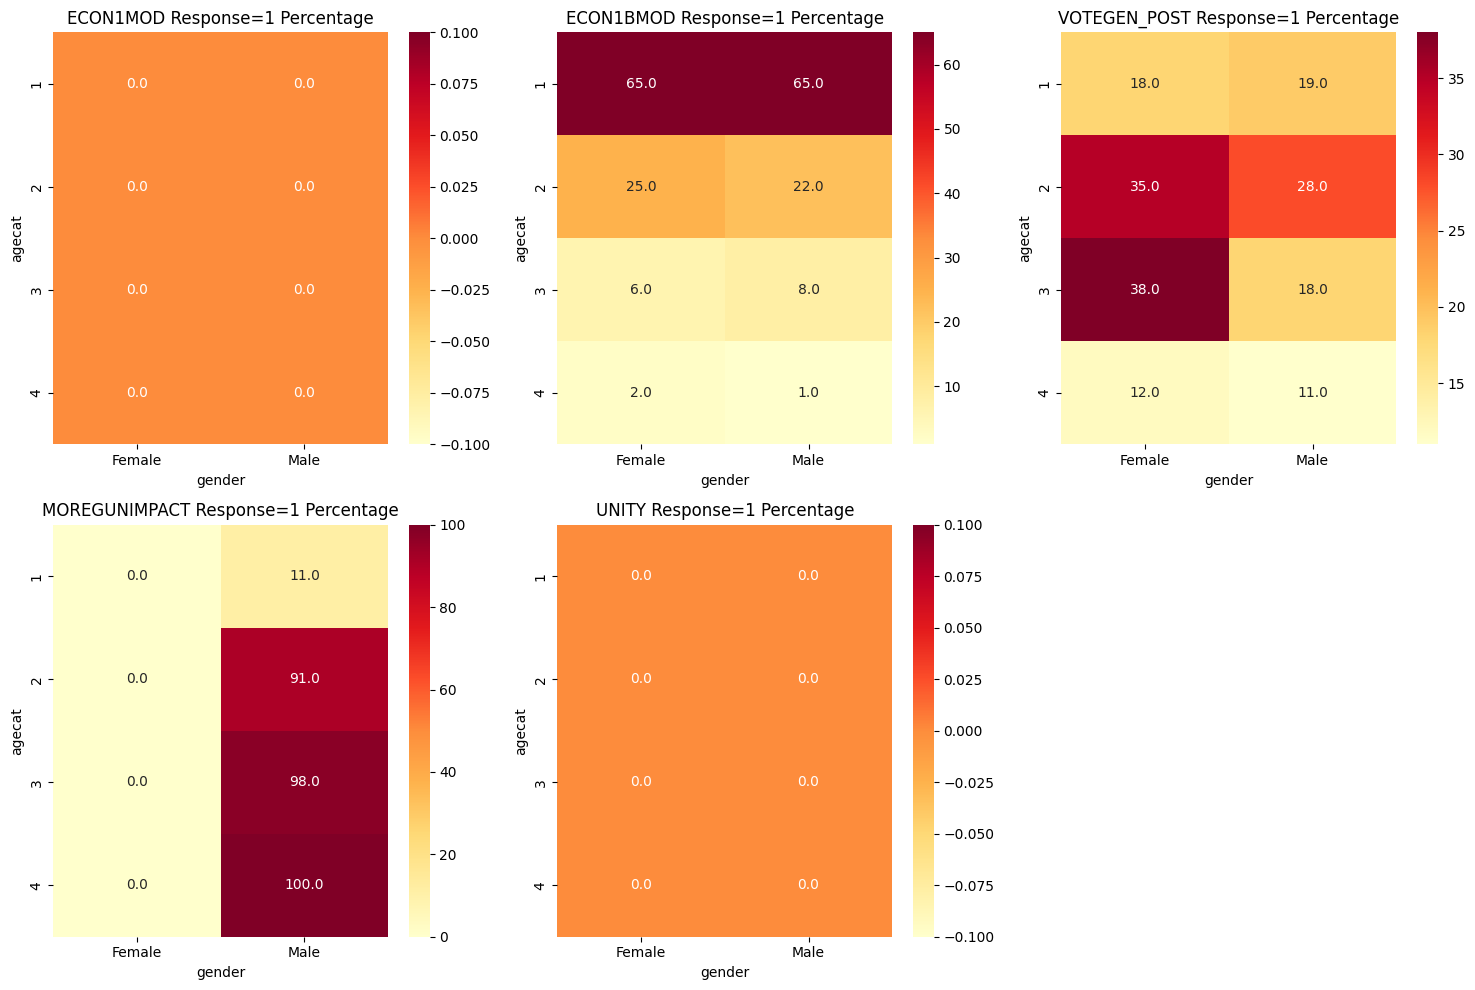

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import experiment_code
import os

# 현재 작업 디렉토리 경로 가져오기
current_dir = os.getcwd()

# 프로젝트 루트 디렉토리 경로 설정
project_root = os.path.dirname(os.path.dirname(current_dir))


df_path = os.path.join(project_root,f'data/_data/_result/{experiment_code}/survey_results_{experiment_code}.csv')

# 데이터 로드
final_df = pd.read_csv('/home/comoz/main_project/Agent_Survey/data/_data/_result/01/survey_results_01.csv')

# 99값 제거
questions = ['ECON1MOD', 'ECON1BMOD', 'VOTEGEN_POST', 'MOREGUNIMPACT', 'UNITY']


# 1. 연령대별 응답 비율 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, question in enumerate(questions):
    # 연령대별 응답 비율 계산
    prop_data = pd.crosstab(final_df['agecat'], final_df[question], normalize='index') * 100
    prop_data.plot(kind='bar', stacked=True, ax=axes[idx])
    axes[idx].set_title(f'Age Category - {question} Response Distribution')
    axes[idx].set_xlabel('Age Category')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Response')

plt.tight_layout()
plt.show()

# 2. 성별별 응답 비율 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, question in enumerate(questions):
    # 성별별 응답 비율 계산
    prop_data = pd.crosstab(final_df['gender'], final_df[question], normalize='index') * 100
    prop_data.plot(kind='bar', stacked=True, ax=axes[idx])
    axes[idx].set_title(f'Gender - {question} Response Distribution')
    axes[idx].set_xlabel('Gender')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Response')

plt.tight_layout()
plt.show()

# 3. 상세 통계 출력
print("\n=== Response Distribution by Age Category (%) ===")
for question in questions:
    print(f"\n{question} Distribution:")
    age_dist = pd.crosstab(final_df['agecat'], final_df[question], normalize='index') * 100
    print(age_dist.round(2))

print("\n=== Response Distribution by Gender (%) ===")
for question in questions:
    print(f"\n{question} Distribution:")
    gender_dist = pd.crosstab(final_df['gender'], final_df[question], normalize='index') * 100
    print(gender_dist.round(2))


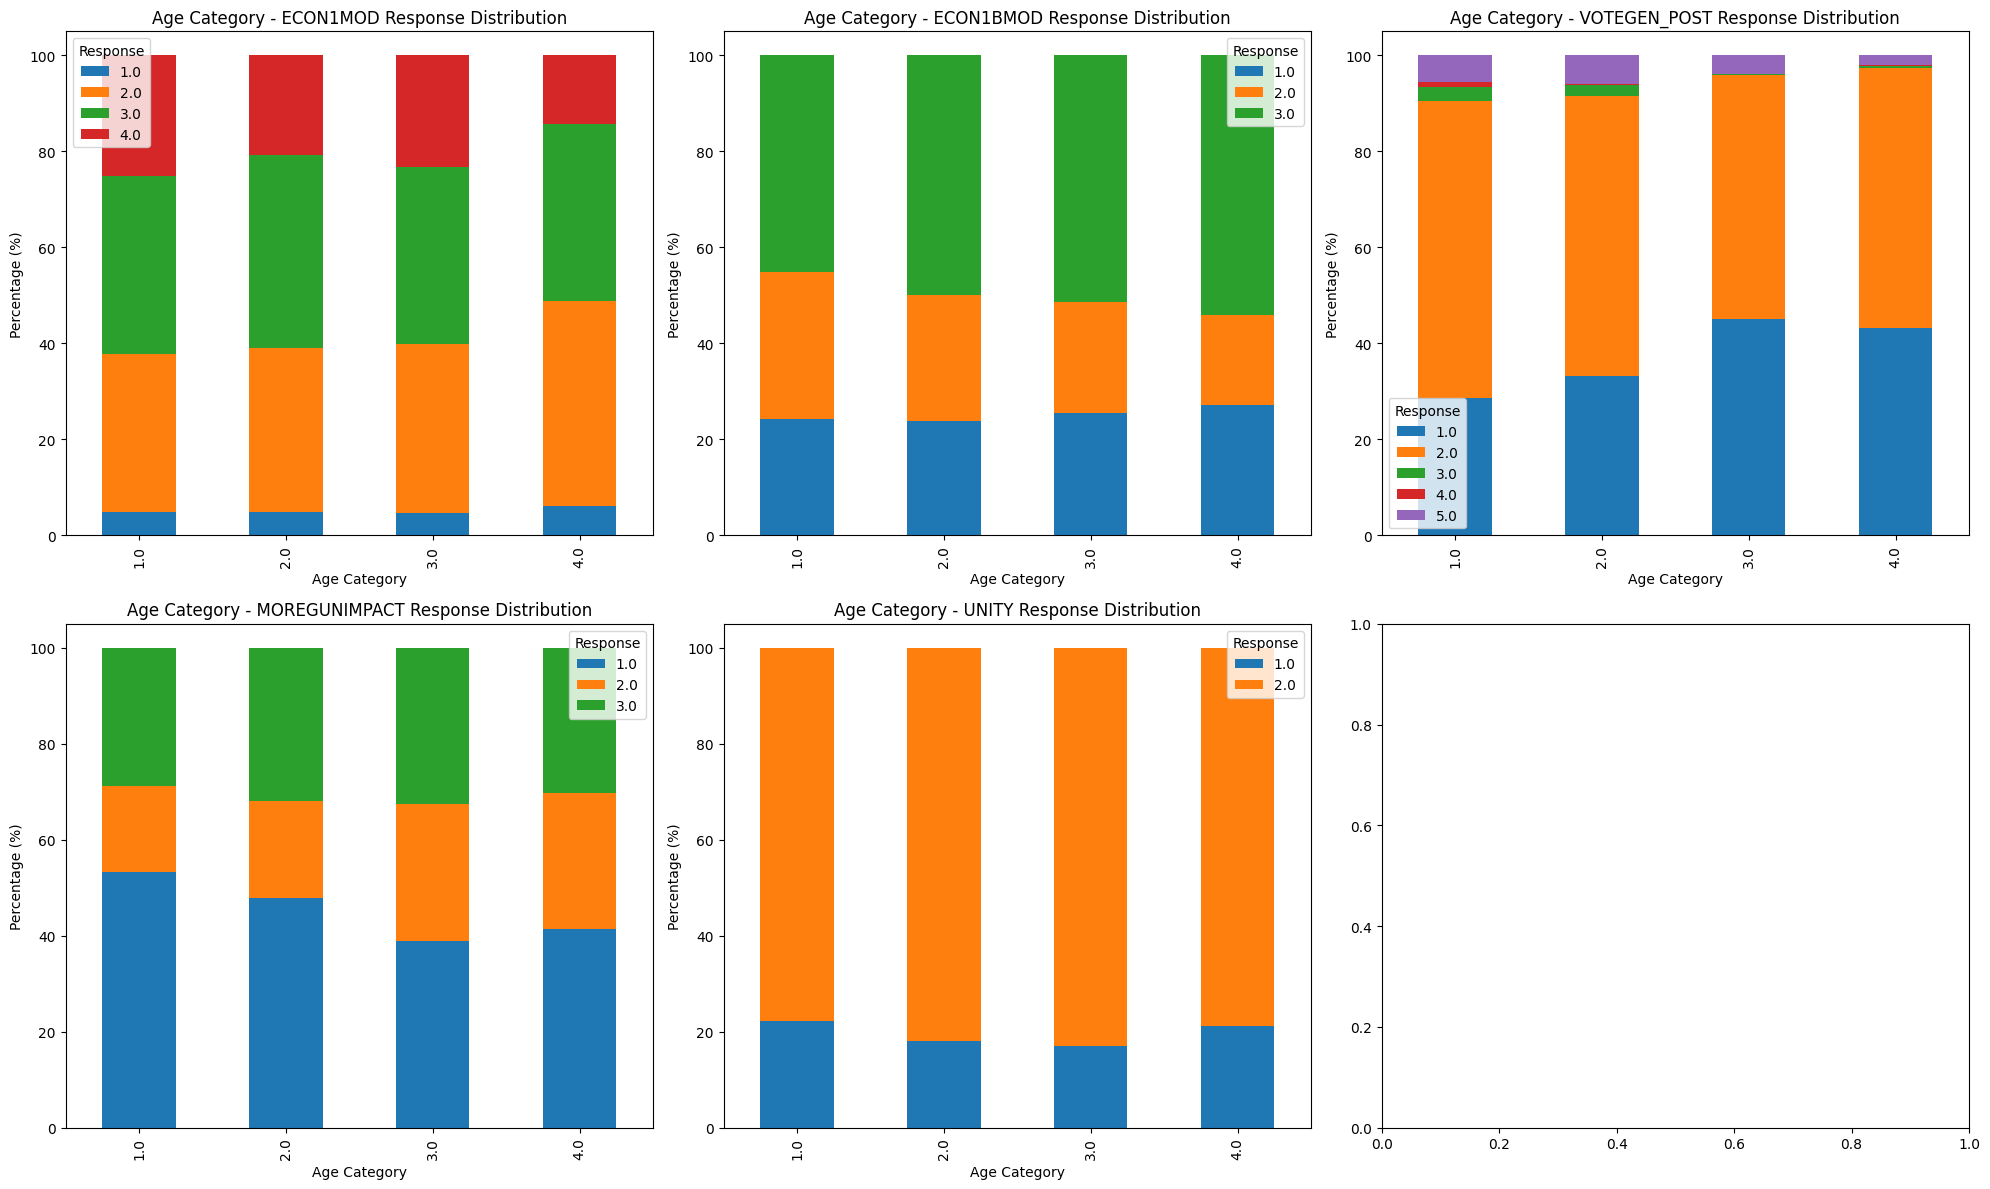

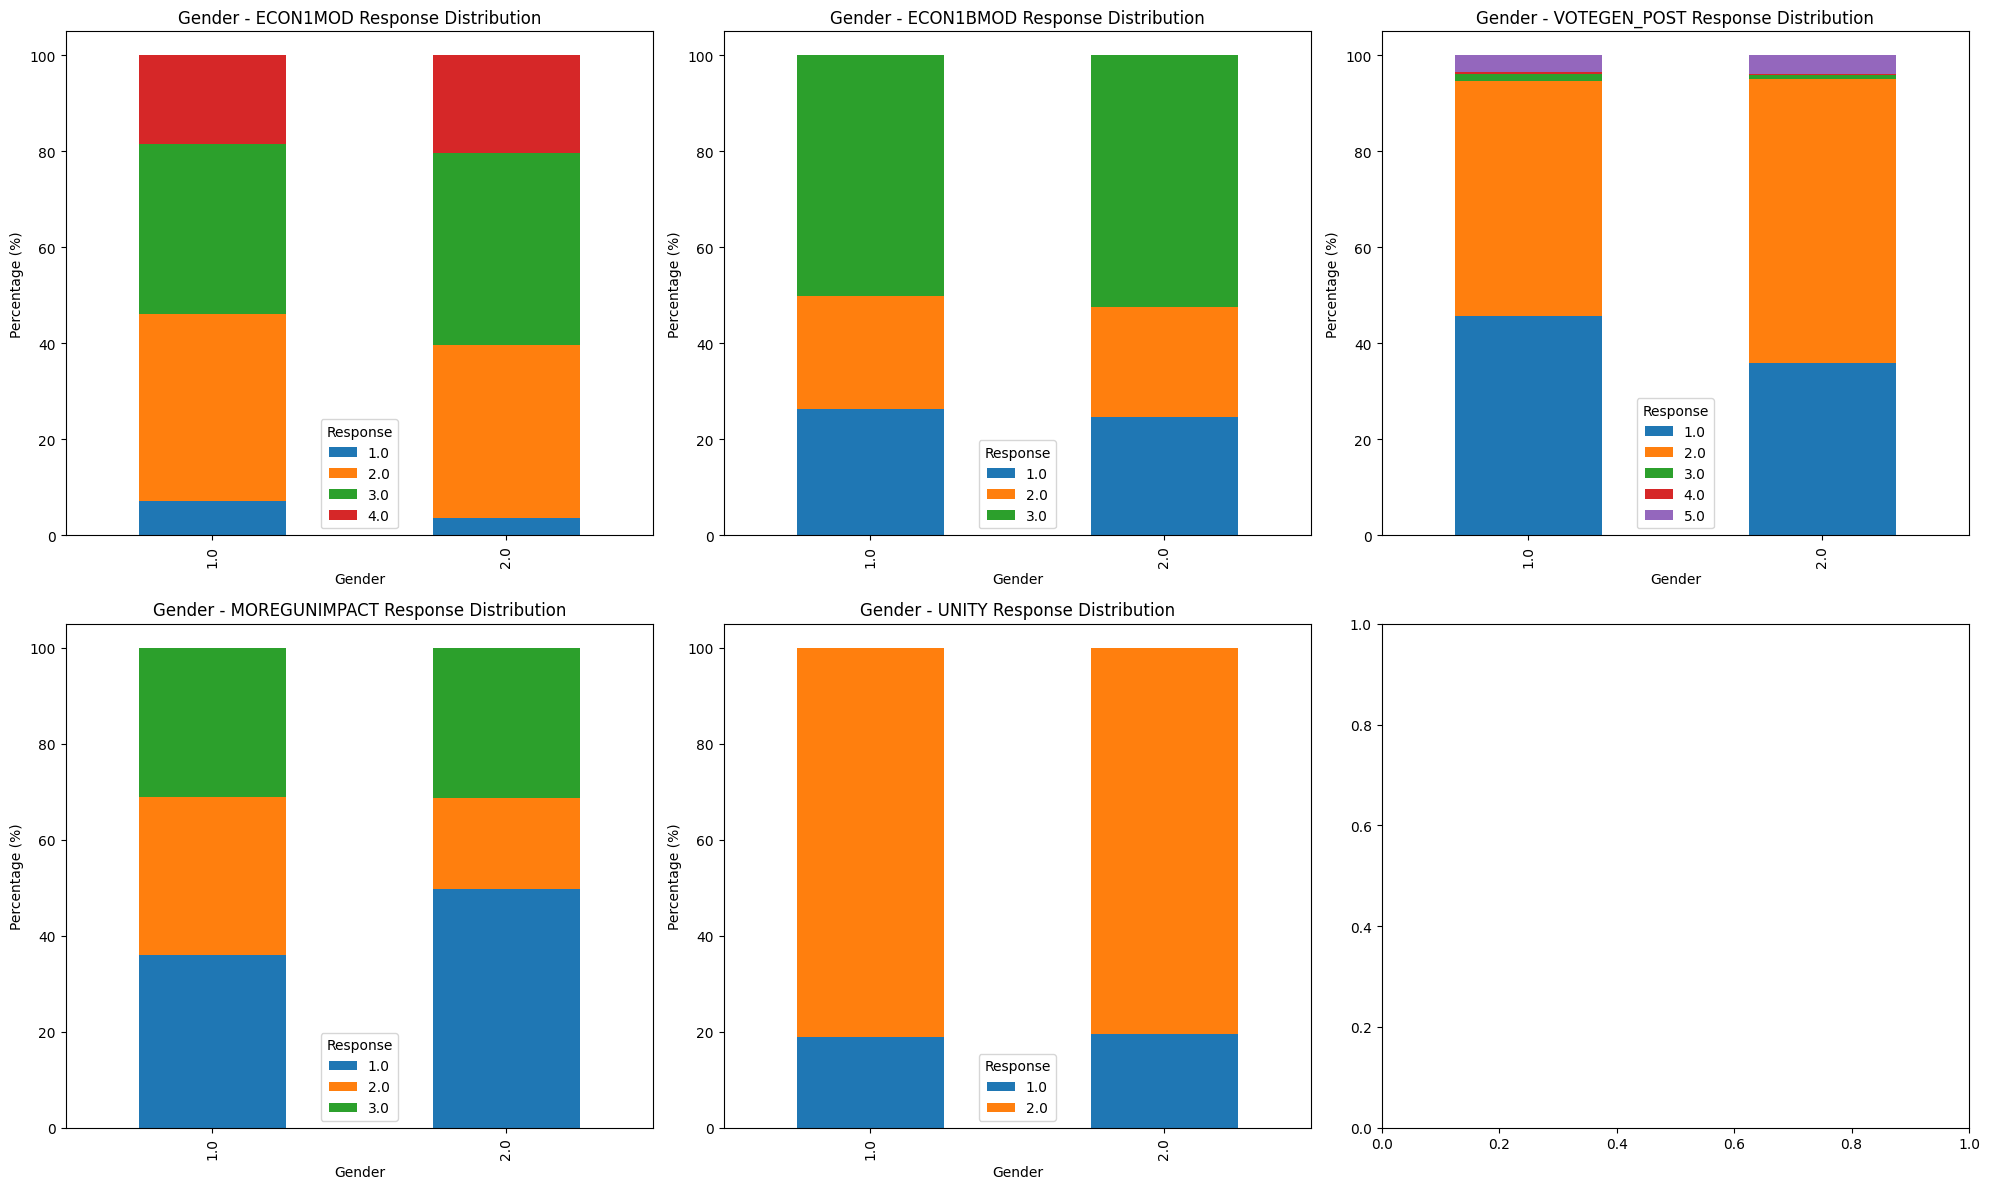


=== Response Distribution by Age Category (%) ===

ECON1MOD Distribution:
ECON1MOD   1.0    2.0    3.0    4.0
AGECAT                             
1.0       4.88  32.91  37.15  25.05
2.0       4.80  34.23  40.14  20.83
3.0       4.56  35.26  36.97  23.22
4.0       6.10  42.72  36.96  14.22

ECON1BMOD Distribution:
ECON1BMOD    1.0    2.0    3.0
AGECAT                        
1.0        24.20  30.57  45.22
2.0        23.72  26.35  49.93
3.0        25.57  22.93  51.50
4.0        27.07  18.78  54.15

VOTEGEN_POST Distribution:
VOTEGEN_POST    1.0    2.0   3.0   4.0   5.0
AGECAT                                      
1.0           28.70  61.74  3.04  0.87  5.65
2.0           33.27  58.18  2.39  0.28  5.88
3.0           45.00  50.91  0.26  0.00  3.83
4.0           43.15  54.18  0.50  0.12  2.05

MOREGUNIMPACT Distribution:
MOREGUNIMPACT    1.0    2.0    3.0
AGECAT                            
1.0            53.29  17.83  28.87
2.0            47.83  20.17  32.00
3.0            38.82  28.56  32

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드

import pandas as pd
import pyreadstat

df, meta = pyreadstat.read_sav('/home/comoz/main_project/Agent_Survey/data/NPORS-2024-Data-Release/NPORS_2024_for_public_release.sav')


# 1. 연령대(agecat)별 분석
questions = ['ECON1MOD', 'ECON1BMOD', 'VOTEGEN_POST', 'MOREGUNIMPACT', 'UNITY']
for q in questions:
    df = df[df[q] != 99]

df=df[df['GENDER'] != 3]
df=df[df['GENDER'] != 99]
df=df[df['AGECAT'] != 99]

# 1. 연령대별 응답 비율 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, question in enumerate(questions):
    # 연령대별 응답 비율 계산
    prop_data = pd.crosstab(df['AGECAT'], df[question], normalize='index') * 100
    prop_data.plot(kind='bar', stacked=True, ax=axes[idx])
    axes[idx].set_title(f'Age Category - {question} Response Distribution')
    axes[idx].set_xlabel('Age Category')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Response')

plt.tight_layout()
plt.show()

# 2. 성별별 응답 비율 시각화
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for idx, question in enumerate(questions):
    # 성별별 응답 비율 계산
    prop_data = pd.crosstab(df['GENDER'], df[question], normalize='index') * 100
    prop_data.plot(kind='bar', stacked=True, ax=axes[idx])
    axes[idx].set_title(f'Gender - {question} Response Distribution')
    axes[idx].set_xlabel('Gender')
    axes[idx].set_ylabel('Percentage (%)')
    axes[idx].legend(title='Response')

plt.tight_layout()
plt.show()

# 3. 상세 통계 출력
print("\n=== Response Distribution by Age Category (%) ===")
for question in questions:
    print(f"\n{question} Distribution:")
    age_dist = pd.crosstab(df['AGECAT'], df[question], normalize='index') * 100
    print(age_dist.round(2))

print("\n=== Response Distribution by Gender (%) ===")
for question in questions:
    print(f"\n{question} Distribution:")
    gender_dist = pd.crosstab(df['GENDER'], df[question], normalize='index') * 100
    print(gender_dist.round(2))
